# HEART DISEASE PREDICTION

# DATA VIEWING

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\divya\Downloads\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [240]:
#Changing the names of the features for better understanding.
new_names = {
    "age": "Age",
    "sex": "Sex",
    "cp": "Chest_pain",
    "trestbps": "Resting_blood_pressure",
    "chol": "cholesterol",
    "fbs": "Fasting_blood_sugar",
    "restecg": "electrocardiographic",
    "thalach": "Maximum_heart_rate",
    "exang": "Exercise_induced_angina",
    "oldpeak": "old_peak",
    "slope": "Slope_of_peak_exercise",
    "ca": "Number_major_vessels",
    "thal": "stress_test",
}
df.rename(columns=new_names, inplace=True)
df

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [241]:
#checking the data types
df.dtypes

Age                          int64
Sex                          int64
Chest_pain                   int64
Resting_blood_pressure       int64
cholesterol                  int64
Fasting_blood_sugar          int64
electrocardiographic         int64
Maximum_heart_rate           int64
Exercise_induced_angina      int64
old_peak                   float64
Slope_of_peak_exercise       int64
Number_major_vessels         int64
stress_test                  int64
target                       int64
dtype: object

# Exploratory Data Analysis

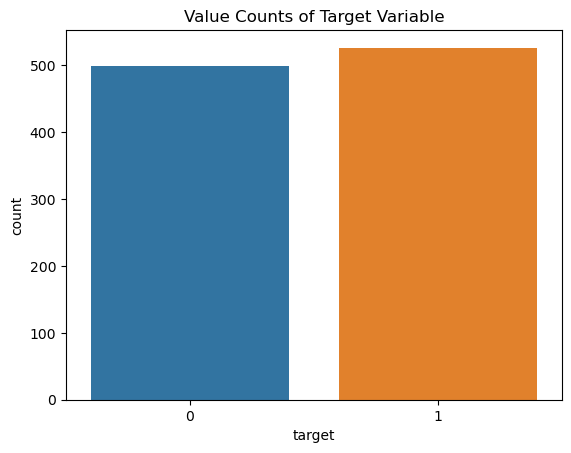

In [242]:
# checking for the balance in the target variable
sns.countplot(x='target', data=df)
plt.title('Value Counts of Target Variable')
plt.show()

In [243]:
# the output variable is balanced enough

In [244]:
# Summary statistics
summary_stats = df.describe()
print("\nSummary Statistics:")
summary_stats


Summary Statistics:


,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [245]:
#finding out the numerical and categorical columns

categorical_columns = [col for col in df.columns if df[col].nunique() < 5]
numerical_columns = [col for col in df.columns if col not in categorical_columns]

print("Categorical Variables:")
print(categorical_columns)
print("\nNumerical Variables:")
print(numerical_columns)

Categorical Variables:
['Sex', 'Chest_pain', 'Fasting_blood_sugar', 'electrocardiographic', 'Exercise_induced_angina', 'Slope_of_peak_exercise', 'stress_test', 'target']

Numerical Variables:
['Age', 'Resting_blood_pressure', 'cholesterol', 'Maximum_heart_rate', 'old_peak', 'Number_major_vessels']


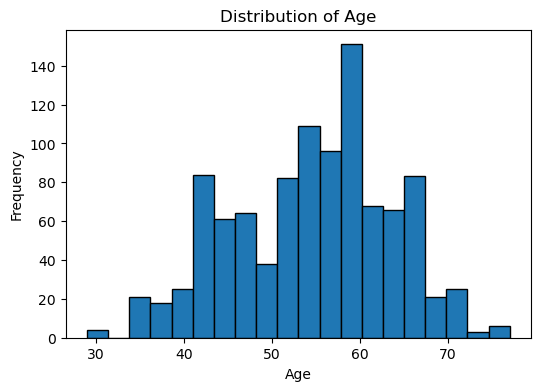

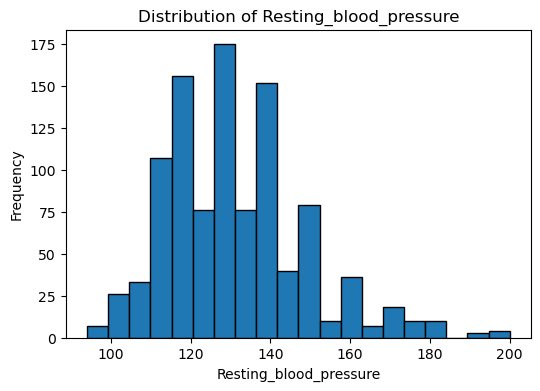

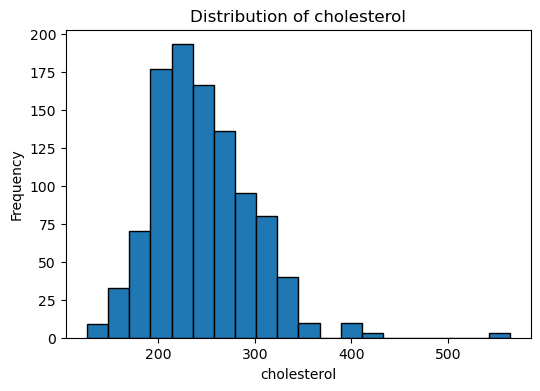

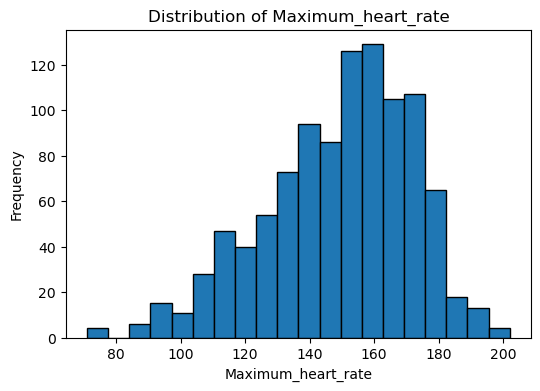

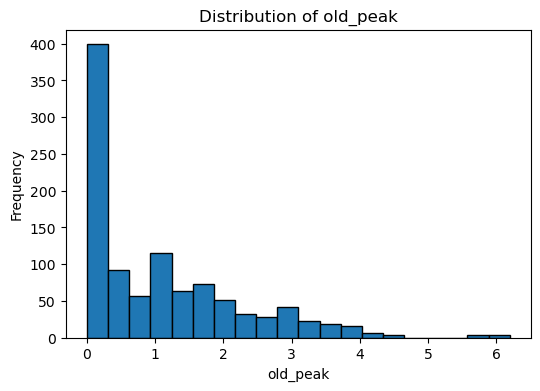

In [246]:
#distribution of numerical columns

columns = ['Age', 'Resting_blood_pressure', 'cholesterol', 
                     'Maximum_heart_rate', 'old_peak']
for column in columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=20, edgecolor='k')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

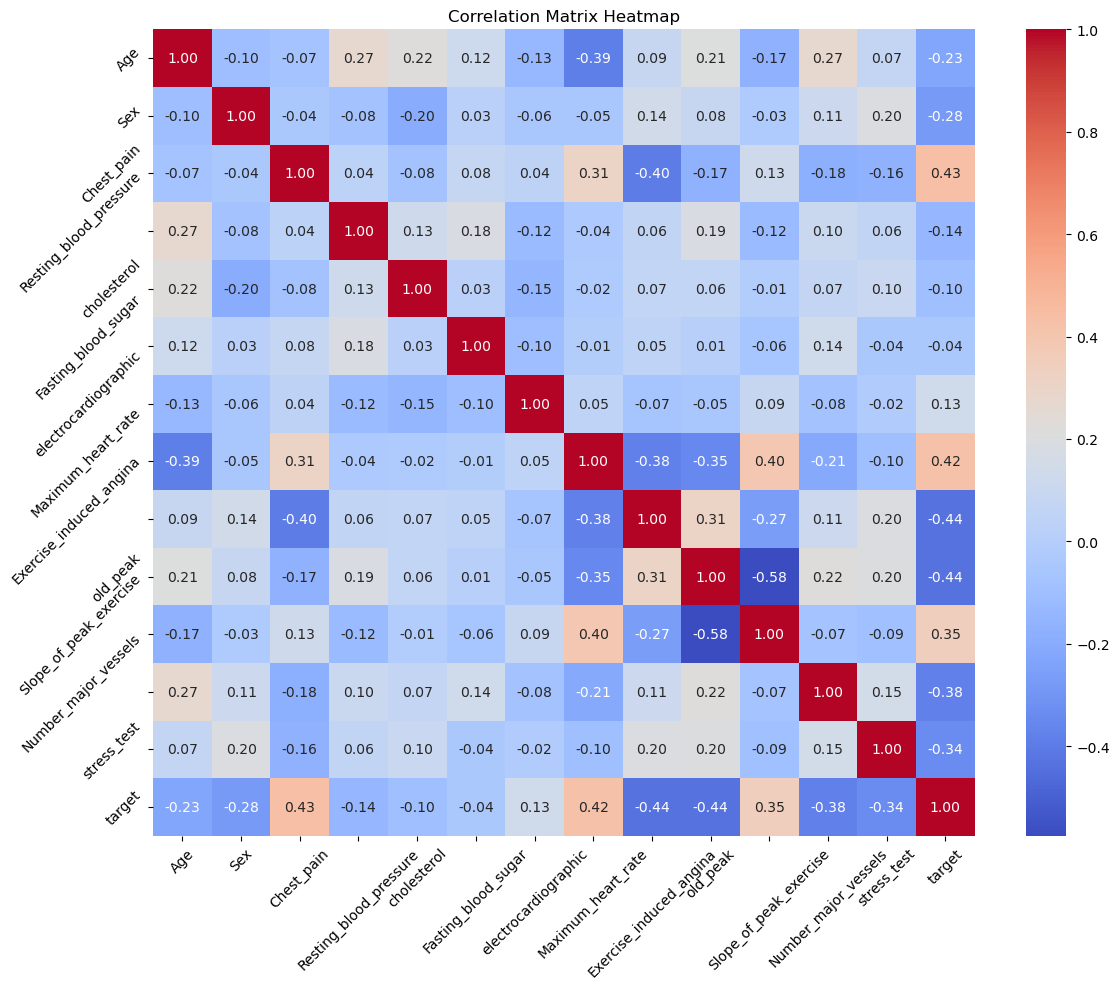

In [247]:
# Heatmap for correlation

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

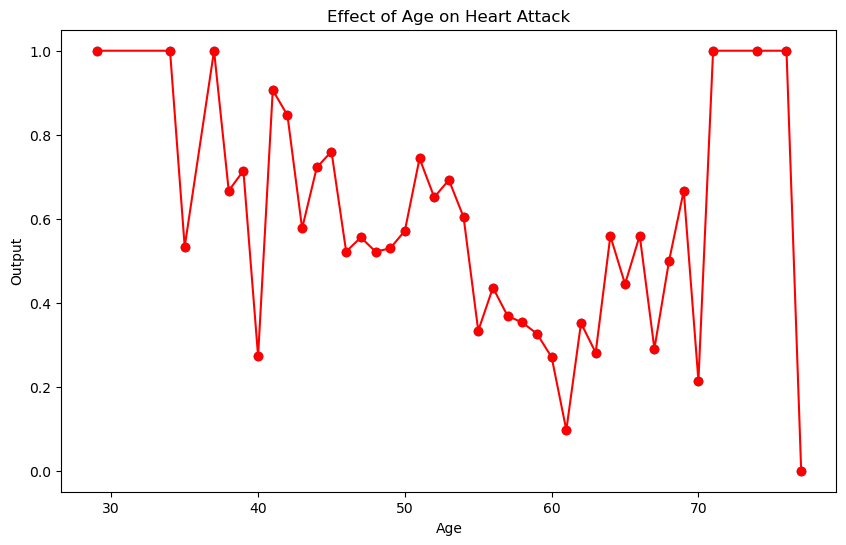

In [248]:
#effect of age on heart attack
heart_mean = df.groupby('Age')['target'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(heart_mean['Age'], heart_mean['target'])
plt.plot(heart_mean['Age'], heart_mean['target'], color='r', linestyle='-', marker='o', label='Line Plot')
plt.title('Effect of Age on Heart Attack')
plt.xlabel('Age')
plt.ylabel('Output')
plt.show()

# Feature Engineering

In [249]:
X = df.drop(columns=['target'])
y=df['target']
cat_col = []
num_col = []
for column in X.columns:
    # Check if the column has discrete values (<= 5 unique values)
    if X[column].nunique() <= 5:
        cat_col.append(column)
    else:
        num_col.append(column)
print(cat_col)

['Sex', 'Chest_pain', 'Fasting_blood_sugar', 'electrocardiographic', 'Exercise_induced_angina', 'Slope_of_peak_exercise', 'Number_major_vessels', 'stress_test']


In [250]:
num_col

['Age',
 'Resting_blood_pressure',
 'cholesterol',
 'Maximum_heart_rate',
 'old_peak']

In [251]:
cat_columns = X[cat_col]

# one-hot  
cat_columns = pd.get_dummies(cat_columns, columns = cat_col).astype(int)
display(cat_columns.head()) 
cat_columns.shape

,Sex_0,Sex_1,Chest_pain_0,Chest_pain_1,Chest_pain_2,Chest_pain_3,Fasting_blood_sugar_0,Fasting_blood_sugar_1,electrocardiographic_0,electrocardiographic_1,...,Slope_of_peak_exercise_2,Number_major_vessels_0,Number_major_vessels_1,Number_major_vessels_2,Number_major_vessels_3,Number_major_vessels_4,stress_test_0,stress_test_1,stress_test_2,stress_test_3
0,0,1,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,1,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,0,1,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


(1025, 25)

In [252]:
num_columns = X[num_col]
# normalization of numerical columns
num_columns = num_columns.apply(lambda x:(x - x.min())/(x.max() - x.min() ), axis= 0 )
num_columns.head()

,Age,Resting_blood_pressure,cholesterol,Maximum_heart_rate,old_peak
0,0.479167,0.292453,0.196347,0.740458,0.161290
1,0.500000,0.433962,0.175799,0.641221,0.500000
2,0.854167,0.481132,0.109589,0.412214,0.419355
3,0.666667,0.509434,0.175799,0.687023,0.000000
4,0.687500,0.415094,0.383562,0.267176,0.306452


In [253]:
X_all = num_columns.join(cat_columns)
X_all

,Age,Resting_blood_pressure,cholesterol,Maximum_heart_rate,old_peak,Sex_0,Sex_1,Chest_pain_0,Chest_pain_1,Chest_pain_2,...,Slope_of_peak_exercise_2,Number_major_vessels_0,Number_major_vessels_1,Number_major_vessels_2,Number_major_vessels_3,Number_major_vessels_4,stress_test_0,stress_test_1,stress_test_2,stress_test_3
0,0.479167,0.292453,0.196347,0.740458,0.161290,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0.500000,0.433962,0.175799,0.641221,0.500000,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0.854167,0.481132,0.109589,0.412214,0.419355,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.666667,0.509434,0.175799,0.687023,0.000000,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0.687500,0.415094,0.383562,0.267176,0.306452,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,0.433962,0.216895,0.709924,0.000000,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
1021,0.645833,0.292453,0.301370,0.534351,0.451613,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1022,0.375000,0.150943,0.340183,0.358779,0.161290,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1023,0.437500,0.150943,0.292237,0.671756,0.000000,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


# Machine Learning Models

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state= 100)

# KNN Model

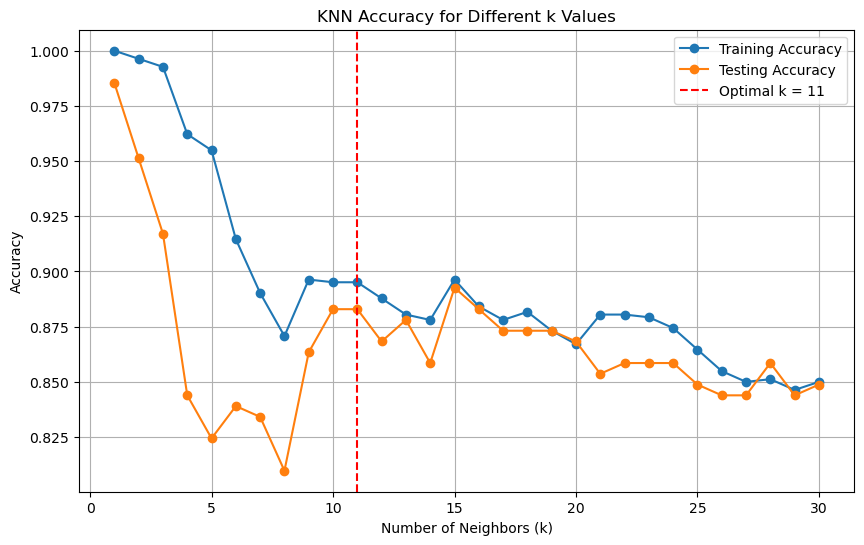

The optimal k where accuracies stabilize is 11


In [255]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
k_range = range(1, 31)
train_scores = []
test_scores = []

improvement_threshold = 0.001
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculating training and testing accuracy
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    
    train_scores.append(train_acc)
    test_scores.append(test_acc)

optimal_k = None
for i in range(1, len(k_range)):
    train_diff = abs(train_scores[i] - train_scores[i - 1])
    test_diff = abs(test_scores[i] - test_scores[i - 1]) 
    
    if train_diff < improvement_threshold and test_diff < improvement_threshold:
        optimal_k = i + 1
        break

plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, label='Training Accuracy', marker='o')
plt.plot(k_range, test_scores, label='Testing Accuracy', marker='o')
if optimal_k is not None:
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.legend()
plt.grid()
plt.show()

if optimal_k is not None:
    print(f"The optimal k where accuracies stabilize is {optimal_k}")
else:
    print("No k satisfies the stabilization criteria within the given range.")


Accuracy with optimal k=11: 0.8829
Training Accuracy at k=11: 0.8951
Testing Accuracy at k=11: 0.8829

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        97
           1       0.93      0.84      0.88       108

    accuracy                           0.88       205
   macro avg       0.88      0.89      0.88       205
weighted avg       0.89      0.88      0.88       205



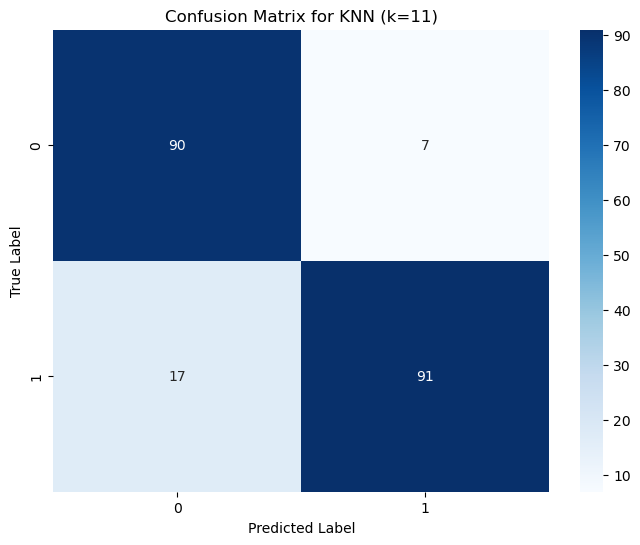

In [256]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best.fit(X_train, y_train)

y_pred = knn_best.predict(X_test)

k_NN_acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy with optimal k={optimal_k}: {k_NN_acc:.4f}")
print(f"Training Accuracy at k={optimal_k}: {train_scores[optimal_k - 1]:.4f}")
print(f"Testing Accuracy at k={optimal_k}: {test_scores[optimal_k - 1]:.4f}")
print("\nClassification Report:")
print(class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title(f"Confusion Matrix for KNN (k={optimal_k})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Logistic Regression

Logistic Regression Training Accuracy: 0.8671
Logistic Regression Testing Accuracy: 0.8439

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.87      0.82      0.85       108

    accuracy                           0.84       205
   macro avg       0.84      0.85      0.84       205
weighted avg       0.85      0.84      0.84       205



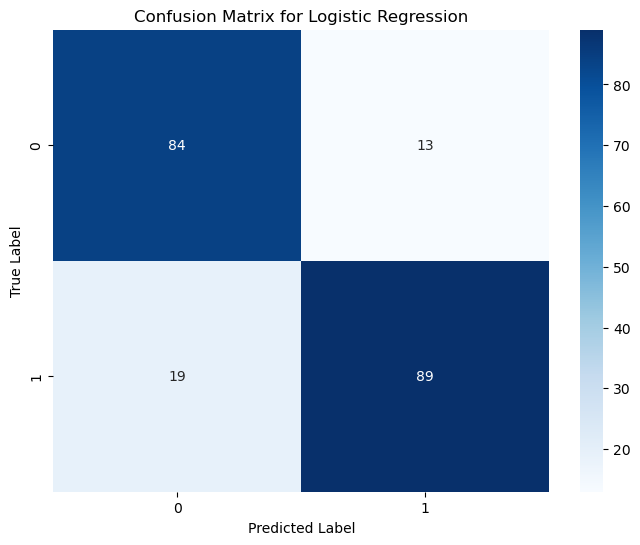

In [259]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred_log_reg)

log_reg_class_report = classification_report(y_test, y_pred_log_reg)
log_reg_conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

print(f"Logistic Regression Training Accuracy: {train_accuracy:.4f}")
print(f"Logistic Regression Testing Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(log_reg_class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# GradientBoost Classifier

Gradient Boosting Training Accuracy: 0.9622
Gradient Boosting Testing Accuracy: 0.9561
Gradient Boosting AUC-ROC: 0.9925

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        97
           1       0.96      0.95      0.96       108

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



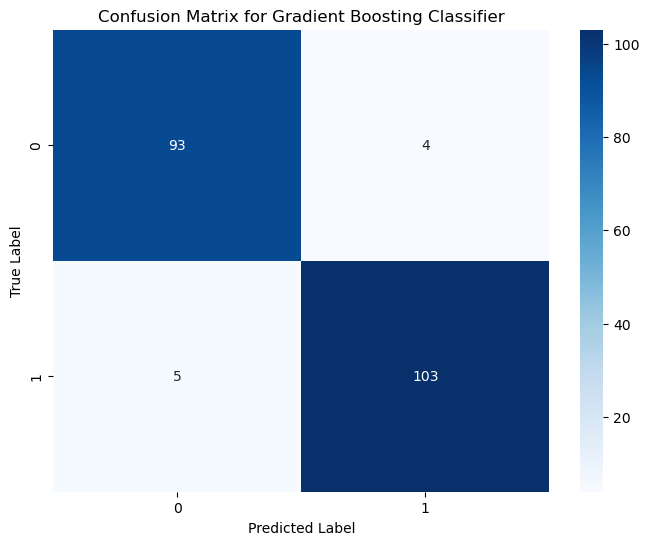

In [260]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42, max_depth=3, n_estimators=50)
gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)
y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]

train_accuracy = gb_clf.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred_gb)
gb_auc = roc_auc_score(y_test, y_prob_gb)
gb_class_report = classification_report(y_test, y_pred_gb)
gb_conf_matrix = confusion_matrix(y_test, y_pred_gb)

print(f"Gradient Boosting Training Accuracy: {train_accuracy:.4f}")
print(f"Gradient Boosting Testing Accuracy: {test_accuracy:.4f}")
print(f"Gradient Boosting AUC-ROC: {gb_auc:.4f}")
print("\nClassification Report:")
print(gb_class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Models comparison using ROC curve

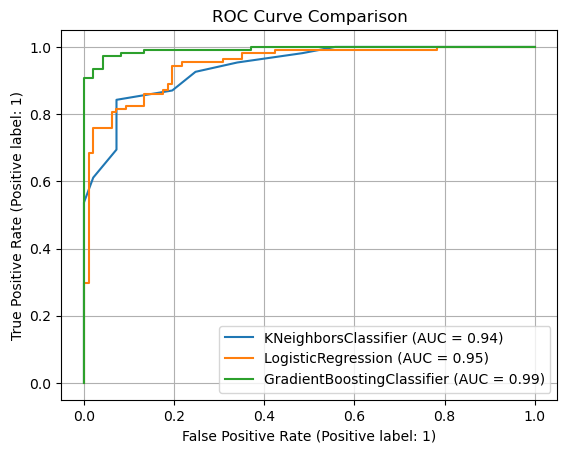

In [261]:
classifiers = [knn_best,log_reg, gb_clf]
ax = plt.gca()

# Plot ROC curves for all classifiers
for c in classifiers:
    RocCurveDisplay.from_estimator(c, X_test, y_test, ax=ax)

# Finalize the plot
plt.title("ROC Curve Comparison")
plt.grid()
plt.legend(loc='lower right')
plt.show()


# Summary

* from the above ROC curves of the three algorithms we used we can say that GradientBoost classifier performed with accuracy of 95% and best AUC.